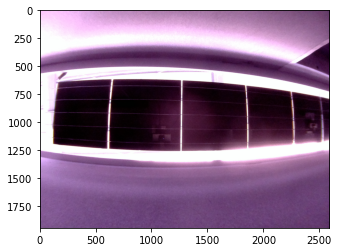

Original Dimensions :  (4192, 4192, 3)


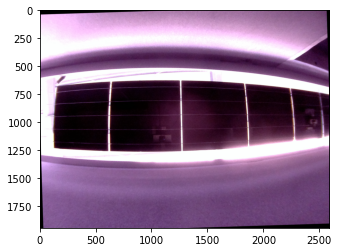

--- 1.0317120552062988 seconds for rotation ---


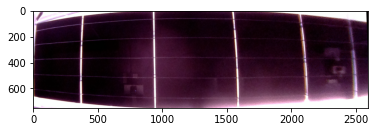

--- 2.2756989002227783 seconds for perspective---


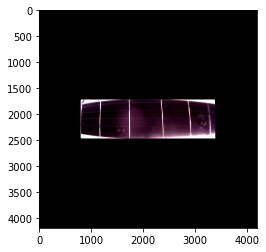

--- 4.480388164520264 seconds for perspective---


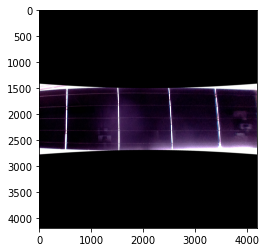

--- 17.21501111984253 seconds for fisheye---


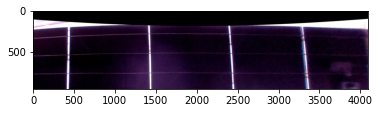

<Figure size 432x288 with 0 Axes>

In [35]:
from defisheye import Defisheye
import os
from PIL import Image
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
import time

border = 800
def make_square(im, min_size=256, fill_color=(0, 0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result
  
test_image = cv2.imread("testFisheye.png")
plt.imshow(test_image)
plt.show()

test_image = cv2.imread("testFisheye.png", cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)



start_time = time.time()
result = rotate_image(test_image, 1.8)

plt.imshow(result)
plt.show()
print("--- %s seconds for rotation ---" % (time.time() - start_time))
cv2.imwrite("testFisheyeRotated.png", result)

# Locate points of the documents or object which you want to transform
pts1 = np.float32([[115, 580], [2592, 580], [115, 1320], [2592, 1320]])
pts2 = np.float32([[0, 0], [2592, -180], [0, 750], [2592, 960]])
  
# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)

result = cv2.warpPerspective(result, matrix, (2592, 750))
plt.imshow(result)
plt.show()
cv2.imwrite("testFisheyeTransform.png", result)
print("--- %s seconds for perspective---" % (time.time() - start_time))

result = cv2.copyMakeBorder( result, 921+border, 921+border, border, border, cv2.BORDER_CONSTANT)
plt.imshow(result)
plt.show()
print("--- %s seconds for perspective---" % (time.time() - start_time))

cv2.imwrite("testFisheyeSquare.png", result)

img = "testFisheyeSquare.png"
img_out = "testFisheye_corrected.png"

dtype = 'linear'
format = 'fullframe'
fov = 179
pfov = 90
obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)
obj.convert(img_out)

import matplotlib.image as mpimg
img = mpimg.imread(img_out)
imgplot = plt.imshow(img)
plt.show()
print("--- %s seconds for fisheye---" % (time.time() - start_time))

crop_img = img[1321:2271, 100:4992]
imgplot = plt.imshow(crop_img)
plt.show()
plt.savefig('cropped.png')

In [1]:
# You should replace these 3 lines with the output in calibration step
from matplotlib import pyplot as plt
import cv2 
import numpy as np 
DIM=(2500, 1944)
K=np.array([[2500.3524863867165, 100.0, 2500.7118000552183], [00.0, 10000.5071163774452, 500.3314451453386], [0.0, 0.0, 1.0]])
D=np.array([[-0.042595202508066574], [0.031307765215775184], [-0.04104704724832258], [.115343014605793324]])
def undistort(img_path):
    img = cv2.imread(img_path)
    h,w = img.shape[:2]
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    plt.imshow(undistorted_img)
    plt.show()
    
undistort("real1.jpeg")

ModuleNotFoundError: No module named 'cv2'

In [2]:
# import the necessary packages
import numpy as np
import cv2
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
    return rect

In [3]:
def gamma_trans(img, gamma):
    gamma_table=[np.power(x/255.0,gamma)*255.0 for x in range(256)]
    gamma_table=np.round(np.array(gamma_table)).astype(np.uint8)
    return cv2.LUT(img,gamma_table)

In [46]:
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = gamma_trans(image, 0.6)
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    resized = cv2.resize(warped, (400,400), interpolation = cv2.INTER_AREA)
    resized_border = cv2.copyMakeBorder(resized,2,2,2,2,cv2.BORDER_CONSTANT, value = [255,255,255])
    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    im = cv2.filter2D(resized_border, -1, kernel)
    # return the warped image
    return im

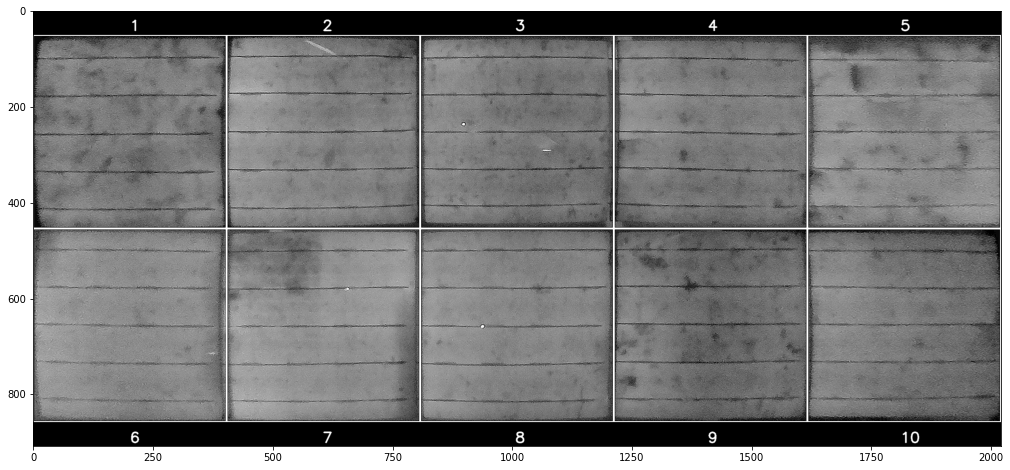

(<matplotlib.image.AxesImage at 0x133290e50>, None)

In [51]:
# import the necessary packages
#from pyimagesearch.transform import four_point_transform
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
# construct the argument parse and parse the arguments
# load the image and grab the source coordinates (i.e. the list of
# of (x, y) points)
# NOTE: using the 'eval' function is bad form, but for this example
# let's just roll with it -- in future posts I'll show you how to
# automatically determine the coordinates without pre-supplying them
left_cells = cv2.imread("el2_image.png")
right_cells = cv2.imread("el1_image.png")
# define the points for the 5 left cells that will be shown on top
pts_top = []
pts_top.append(np.array([(50, 760), (470, 710), (500, 1320), (75, 1290)], dtype = "float32"))
pts_top.append(np.array([(470, 710), (1080, 660), (1100, 1340), (500, 1320)], dtype = "float32"))
pts_top.append(np.array([(1080, 660), (1740, 650), (1760, 1310), (1100, 1340)], dtype = "float32"))
pts_top.append(np.array([(1730, 650), (2235, 670), (2250, 1240), (1750, 1310)], dtype = "float32"))
pts_top.append(np.array([(2235, 670), (2550, 700), (2550, 1190), (2250, 1240)], dtype = "float32"))
# define the points for the 5 right cells that will be shown on bottom
pts_bot = []
pts_bot.append(np.array([(40, 700), (440, 680), (420, 1240), (25, 1190)], dtype = "float32"))
pts_bot.append(np.array([(430, 680), (980, 685), (960, 1290), (410, 1240)], dtype = "float32"))
pts_bot.append(np.array([(980, 685), (1570, 710), (1560, 1300), (960, 1290)], dtype = "float32"))
pts_bot.append(np.array([(1570, 710), (2060, 750), (2040, 1280), (1560, 1300)], dtype = "float32"))
pts_bot.append(np.array([(2060, 750), (2390, 780), (2370, 1250), (2040, 1280)], dtype = "float32"))

# apply the four point tranform to obtain a "birds eye view" of
# the images
images_top = []
for x in pts_top:
    images_top.append(four_point_transform(left_cells, x))

images_bot = []
for x in pts_bot:
    images_bot.append(four_point_transform(right_cells, x))

#concat the images to a 2x5 matrix
im_h_top = cv2.hconcat(images_top)
im_h_bot = cv2.hconcat(images_bot)
combined = cv2.vconcat([im_h_top,im_h_bot])

#add a black border for text top and bottom
combined = cv2.copyMakeBorder(combined, 50, 50, 0, 0, cv2.BORDER_CONSTANT)
font = cv2.FONT_HERSHEY_SIMPLEX
for number in range(1,6):
    cv2.putText(combined, str(number), (-200+402*number,40), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
for number in range(6,11):
    cv2.putText(combined, str(number), (-200+402*(number-5),900), font,1, (255, 255, 255), 2, cv2.LINE_AA)

plt.figure(figsize = (30,8))
plt.imshow(combined, cmap='gray'),plt.show()


In [15]:
import cv2;
import numpy as np;

# Run the code with the image name, keep pressing space bar

# Change the kernel, iterations, Contour Area, position accordingly
# These values work for your present image

img = cv2.imread("real1.jpeg", 0);
h, w = img.shape[:2]
kernel = np.ones((15,15),np.uint8)

e = cv2.erode(img,kernel,iterations = 2)  
d = cv2.dilate(e,kernel,iterations = 1)
ret, th = cv2.threshold(d, 150, 255, cv2.THRESH_BINARY_INV)

mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(th, mask, (200,200), 255); # position = (200,200)
out = cv2.bitwise_not(th)
out= cv2.dilate(out,kernel,iterations = 3)
cnt, h = cv2.findContours(out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(cnt)):
            area = cv2.contourArea(cnt[i])
            if(area>10000 and area<100000):
                  mask = np.zeros_like(img)
                  cv2.drawContours(mask, cnt, i, 255, -1)
                  x,y,w,h = cv2.boundingRect(cnt[i])
                  crop= img[ y:h+y,x:w+x]
                  cv2.imshow("snip",crop )
                  if(cv2.waitKey(0))==27:break

cv2.destroyAllWindows()

In [31]:
from PIL import Image
import numpy as np

im = Image.open('image.png')
sqrWidth = np.ceil(np.sqrt(im.size[0]*im.size[1])).astype(int)
im_resize = im.resize((sqrWidth, sqrWidth))
im_resize.save('output.png')

NameError: name 'Image' is not defined